# 6.3 Geographic Visualization

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data wrangling
#### 3. Consistency Checks
#### 4. Plotting a choropleth

## 1. Importing libraries and data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [10]:
# this command prompts matplotlib visuals to appear in the notebook
%matplotlib inline

In [11]:
# Import ".json" file for countries
country_geo = r'/Users/yusufsalk/Documents/Chocolate Bar Analysis/02 Data/Original Data/custom.geo.json'

In [ ]:
# looking at the JSON file contents

f = open(r'/Users/yusufsalk/Documents/Chocolate Bar Analysis/02 Data/Original Data/custom.geo.json',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 5, 'sovereignt': 'Nicaragua', 'sov_a3': 'NIC', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Nicaragua', 'adm0_a3': 'NIC', 'geou_dif': 0, 'geounit': 'Nicaragua', 'gu_a3': 'NIC', 'su_dif': 0, 'subunit': 'Nicaragua', 'su_a3': 'NIC', 'brk_diff': 0, 'name': 'Nicaragua', 'name_long': 'Nicaragua', 'brk_a3': 'NIC', 'brk_name': 'Nicaragua', 'brk_group': None, 'abbrev': 'Nic.', 'postal': 'NI', 'formal_en': 'Republic of Nicaragua', 'formal_fr': None, 'name_ciawf': 'Nicaragua', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Nicaragua', 'name_alt': None, 'mapcolor7': 1, 'mapcolor8': 4, 'mapcolor9': 1, 'mapcolor13': 9, 'pop_est': 6545502, 'pop_rank': 13, 'pop_year': 2019, 'gdp_md': 12520, 'gdp_year': 2019, 'economy': '6. Developing region', 'income_grp': '4. Lower middle income', 'fips_10': 'NU', 'iso_a2': 'NI', 'iso_a2_eh': 'NI', 'iso_a3': 'NIC', 'iso_a3_eh': 'NIC', 

In [ ]:
# define path
path = r'/Users/yusufsalk/Documents/Chocolate Bar Analysis'

In [ ]:
# import the data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_bar.pkl'))

In [ ]:
df.head()

In [16]:
df.shape

(1795, 8)

## 2. Data Wrangling

In [17]:
df.dtypes

company_name            category
specific_bean_origin    category
ref                        int64
review_date                int64
cocoa_percentage         float64
company_location        category
rating                   float64
broad_bean_origin       category
dtype: object

In [18]:
# change data types
df['company_location'] = df['company_location'].astype('str')

In [19]:
# check for unique values in the column
df['company_location'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Niacragua', 'Chile', 'Ghana', 'Iceland', 'Eucador',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

In [20]:
# rename variable names
df["company_location"] = df["company_location"].replace("U.S.A.", "United States", regex=True)
df["company_location"] = df["company_location"].replace("U.K.", "United Kingdom", regex=True)
df["company_location"] = df["company_location"].replace("Scotland", "United Kingdom", regex=True)
df["company_location"] = df["company_location"].replace("Wales", "United Kingdom", regex=True)
df["company_location"] = df["company_location"].replace("St. Lucia", "Saint Lucia", regex=True)
df["company_location"] = df["company_location"].replace("Domincan Republic", "Dominican Republic", regex=True)
df["company_location"] = df["company_location"].replace("Niacragua", "Nicaragua", regex=True)
df["company_location"] = df["company_location"].replace("Eucador", "Ecuador", regex=True)
df["company_location"] = df["company_location"].replace("Amsterdam", "Netherlands", regex=True)

In [21]:
df['company_location'].unique()

array(['France', 'United States', 'Fiji', 'Ecuador', 'Mexico',
       'Switzerland', 'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy',
       'Brazil', 'United Kingdom', 'Australia', 'Belgium', 'Germany',
       'Russia', 'Puerto Rico', 'Venezuela', 'Colombia', 'Japan',
       'New Zealand', 'Costa Rica', 'South Korea', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'Saint Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Dominican Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Chile', 'Ghana', 'Iceland', 'Hungary', 'Suriname',
       'Ireland'], dtype=object)

## 3. Consistency Checks

In [22]:
# check for missing values
df.isnull().sum()

company_name            0
specific_bean_origin    0
ref                     0
review_date             0
cocoa_percentage        0
company_location        0
rating                  0
broad_bean_origin       0
dtype: int64

In [23]:
# check for duplicates
dups = df.duplicated()

In [24]:
dups.shape

(1795,)

<Axes: xlabel='rating', ylabel='Count'>

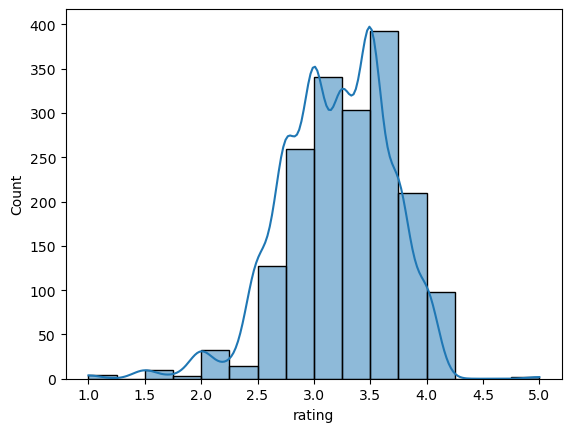

In [25]:
# extreme values checks
sns.histplot(df['rating'], bins=16, kde = True)

## 4. Plotting a choropleth

In [26]:
# create a data frame
data_to_plot = df[['company_location','rating']]
data_to_plot.head()

,company_location,rating
0,France,3.75
1,France,2.75
2,France,3.00
3,France,3.50
4,France,3.50


In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['company_location', 'rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

Which countries produce the highest-rated bars?

There is a research question like the one above and it can be answered by looking at the map.

In the map, it can be seen that the highest-rated chocolate bars are produced in countries such as Chile, Philippines, Iceland, Argentina, Canada, Colombia, Peru, Germany, France, Netherlands, Australia, etc.

Countries such as Poland, India, Ghana, Bolivia, and South Africa stand out with their bright hues. So, we can say that chocolate bars made by these countries are relatively low-rated.

From this point of view, we can ask where these countries buy cocoa beans to use in chocolate production.

In [28]:
map.save(outfile= "country_rating_map.html")